# Laboratorio 7
## Alexander Espinosa Montoya

### 1.Transformada Rapida de Fourier para senales discretas

In [1]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la señal
import matplotlib.pyplot as plt # Libreria para graficar
import numpy as np

In [2]:
def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

1. Genere la siguiente senal de acuerdo con el ultimo numero de su cedula (C) c=0
|sin(2π ∗ (C + 1) ∗ 20 ∗ t)|
La frecuencia de muestreo debe ser al menos 20 veces mayor que la frecuencia de su senal

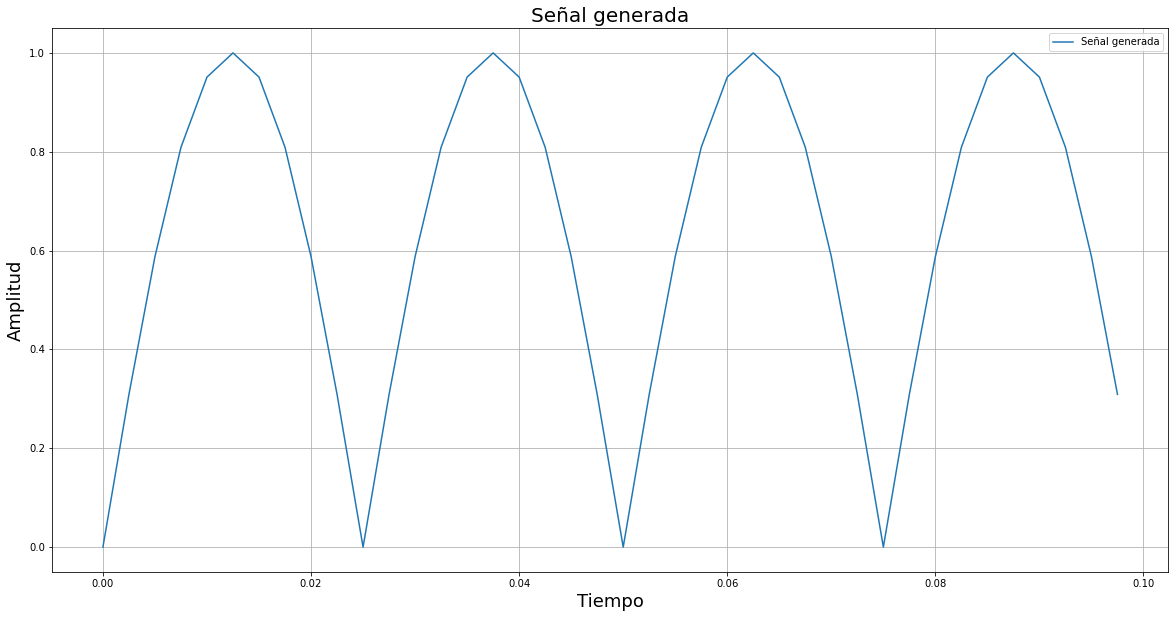

In [3]:
#definimos la frecuencia de la señal.
C=0
f = (C+1)*20
fm = 20*f

#Número de periodos 
nper=0.1

t = np.arange(0,nper,1.0/fm)
señal = np.abs(np.sin(2*np.pi*f*t)) #señal

#grafica
plt.figure(figsize=(20,10))
plt.title("Señal generada",fontsize=20)
plt.plot(t,señal, label="Señal generada")
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.legend()
plt.grid()
plt.show()

2. Calcule la matriz de transformacion U, y calcule y grafique la transformada de Fourier de la senal asignada para al menos 4 distintos valores de NFFT. Grafique los resultados usando subplots. ¿Que se puede concluir al respecto?

Ejemplo con una senal sinusoidal con una frecuencia de 50 Hz, fs=400 Hz, y NFFT=512.

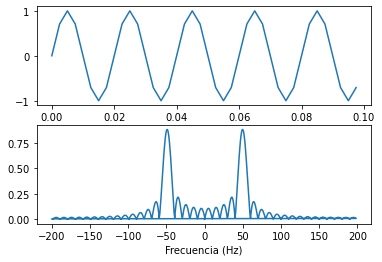

In [4]:
fs=400.0 # frec de muestreo
f=50.0 # frec de la senal
nfft=512 # numero de puntos de la transformada
t = np.arange(0, 0.1, 1/fs) # vector de tiempo
xt=np.sin(2*np.pi*f*t) # senal en el tiempo
xt.shape=(len(xt),1) # Convierto en vector columna para poder multiplicar con la matriz
U=dftmatrix(len(xt), nfft) # calculo la matriz de transformacion
Xf=U.H*xt[:] # calculo la fft
freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias ... para poder graficar la fft en Hz
# genero graficas
plt.subplot(211)
plt.plot(t, xt)
plt.xlabel('Tiempo (seg)')
plt.subplot(212)
plt.plot(freq, np.abs(Xf))
plt.xlabel('Frecuencia (Hz)')
plt.show()

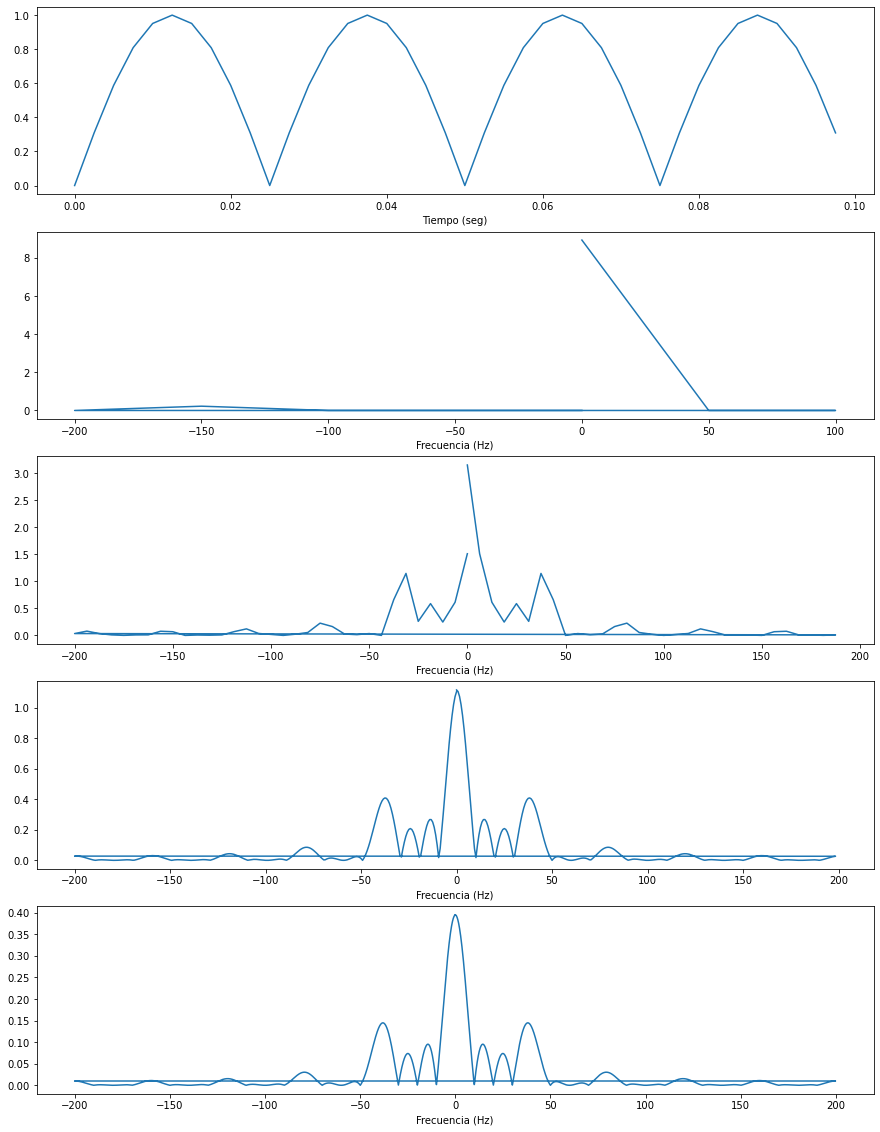

In [5]:
señal.shape=(len(señal),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft1=2**3 # numero de puntos de la transformada
U1=dftmatrix(len(señal), nfft1) # calculo la matriz de transformacion
Xf1=U1.H*señal[:] # calculo la fft
freq1=np.hstack((np.arange(0, nfft1/2-1), np.arange(-nfft1/2, 1)))*fm/nfft1 # vector de frecuencias ... para poder graficar la fft en Hz

nfft2=2**6 # numero de puntos de la transformada
U2=dftmatrix(len(señal), nfft2) # calculo la matriz de transformacion
Xf2=U2.H*señal[:] # calculo la fft
freq2=np.hstack((np.arange(0, nfft2/2-1), np.arange(-nfft2/2, 1)))*fm/nfft2 # vector de frecuencias ... para poder graficar la fft en Hz

nfft3=2**9 # numero de puntos de la transformada
U3=dftmatrix(len(señal), nfft3) # calculo la matriz de transformacion
Xf3=U3.H*señal[:] # calculo la fft
freq3=np.hstack((np.arange(0, nfft3/2-1), np.arange(-nfft3/2, 1)))*fm/nfft3 # vector de frecuencias ... para poder graficar la fft en Hz

nfft4=2**12 # numero de puntos de la transformada
U4=dftmatrix(len(señal), nfft4) # calculo la matriz de transformacion
Xf4=U4.H*señal[:] # calculo la fft
freq4=np.hstack((np.arange(0, nfft4/2-1), np.arange(-nfft4/2, 1)))*fm/nfft4 # vector de frecuencias ... para poder graficar la fft en Hz

#las frecuencias estan en funcion de la frecuencia de muestreo

# genero graficas
plt.figure(figsize=(15,20)) #tamaño de la grafica
plt.subplot(511)
plt.plot(t, señal)
plt.xlabel('Tiempo (seg)')
plt.subplot(512)
plt.plot(freq1, np.abs(Xf1))
plt.xlabel('Frecuencia (Hz)')
plt.subplot(513)
plt.plot(freq2, np.abs(Xf2))
plt.xlabel('Frecuencia (Hz)')
plt.subplot(514)
plt.plot(freq3, np.abs(Xf3))
plt.xlabel('Frecuencia (Hz)')
plt.subplot(515)
plt.plot(freq4, np.abs(Xf4))
plt.xlabel('Frecuencia (Hz)')
plt.show()

¿Que se puede concluir al respecto?
- Entre menos puntos de la transformada de Fourier (NFFT), tendre menor resolucion y mayor sera la perdida de información, cuando la resolucion del NFFT sobrepasa la frecuencia de muestreo, es posible identificar de manera correcta la transformada de Fourier de la señal.
- Al aplicar la trasformada vemos que la señal tiene un valor pico en 0, esto se debe a que nuestra señal al ser unipolar presenta un nivel dc, y se ve reflejado en la componete central

3. Use la siguiente instruccion para calcular la transformada inversa en cada uno de los casos del item anterior.
inversa=np.fft.ifft(signal) #signal: Frequency-domain signal
4. Grafique los resultados usando subplots y comparelos. ¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


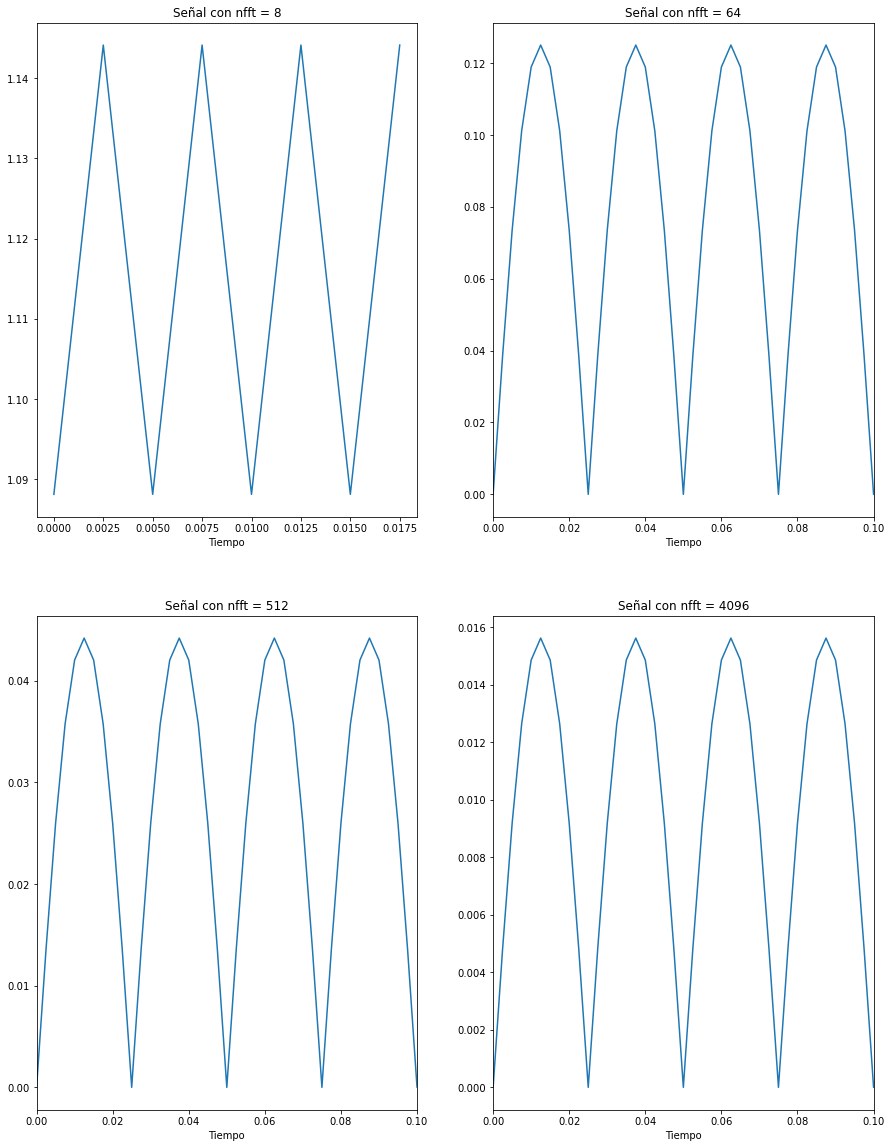

In [6]:
Señales_f = [Xf1,Xf2,Xf3,Xf4]
nfft = [nfft1,nfft2,nfft3,nfft4]
inversas = []
tiempos = []
fs = fm

for i in range(len(Señales_f)):
    inversa=np.fft.ifft(np.transpose(Señales_f[i])) #signal: Frequency-domain signal
    inversas.append(inversa)
    t = np.arange(0,len(np.transpose(inversa))/fs, 1/fs)
    tiempos.append(t)

# genero graficas
plt.figure(figsize=(15,20)) #tamaño de la grafica
plt.subplot(221)
plt.plot(tiempos[0], np.transpose(inversas[0]))
plt.xlabel('Tiempo')
plt.title('Señal con nfft = {}'.format(nfft[0]))

plt.subplot(222)
plt.plot(tiempos[1], np.transpose(inversas[1]))
plt.xlim([0,nper])
plt.xlabel('Tiempo')
plt.title('Señal con nfft = {}'.format(nfft[1]))

plt.subplot(223)
plt.plot(tiempos[2], np.transpose(inversas[2]))
plt.xlim([0,nper])
plt.xlabel('Tiempo')
plt.title('Señal con nfft = {}'.format(nfft[2]))

plt.subplot(224)
plt.plot(tiempos[3], np.transpose(inversas[3]))
plt.xlim([0,nper])
plt.xlabel('Tiempo')
plt.title('Señal con nfft = {}'.format(nfft[3]))

plt.show()

¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.
- Cuando tenemos un bajo numero de nfft nuestra señal no tendra la resolucion necesaria para ser recontruida, en cambio si tenemos un gran numero de nfft nuestra señal sera muy parecida a la original, pero tendra una perdida considerable en la amplitud.

### 2. Modulacion PSK
1. Codifique los dos ultimos digitos de su cedula en binario (4 bits por digito), y arme una trama de bits para ser transmitida.

In [7]:
D1 = [0,0,0,0] # = 0
D2 = [0,0,0,0] # = 0
Trama = D2 + D1
print(Trama)

[0, 0, 0, 0, 0, 0, 0, 0]


2. Usando Eb=1, Tb=0.002, fc=1000 Hz, fs=7000 Hz genere las senales s0 y s1 para la transmision de la trama de bits.

In [8]:
Eb=1
Tb=0.002
fc=1000 #Hz
fs=7000 #Hz
t =  np.arange(0,Tb,1/fs)
s1 = np.sqrt(2*(Eb/Tb))*np.cos(2*np.pi*fc*t)
##s0 = -(np.sqrt(2*(Eb/Tb))*np.cos(2*np.pi*fc*t))
s0 = -1*s1

3. Calcule y grafique la FFT de amplitud y fase de las senales s0 y s1. Cual es la diferencia entre ambas?

In [9]:
nfft=2**12 # numero de puntos de la transformada
s0.shape=(len(s0),1) # Convierto en vector columna para poder multiplicar con la matriz
U=dftmatrix(len(s0), nfft) # calculo la matriz de transformacion
Xf0=U.H*s0[:] # calculo la fft
freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias ...

s1.shape=(len(s1),1) # Convierto en vector columna para poder multiplicar con la matriz
U=dftmatrix(len(s1), nfft)
Xf1=U.H*s1[:] # calculo la fft
freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias ...

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Fase')

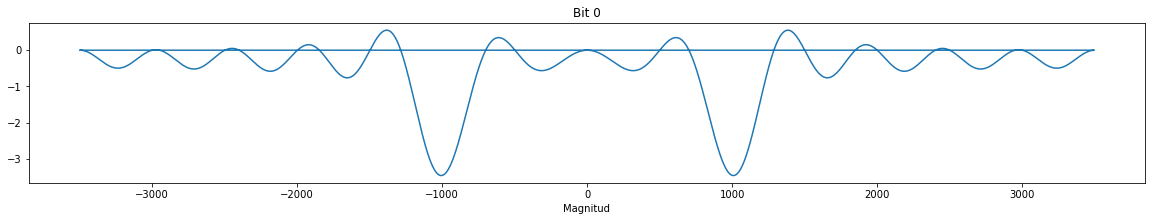

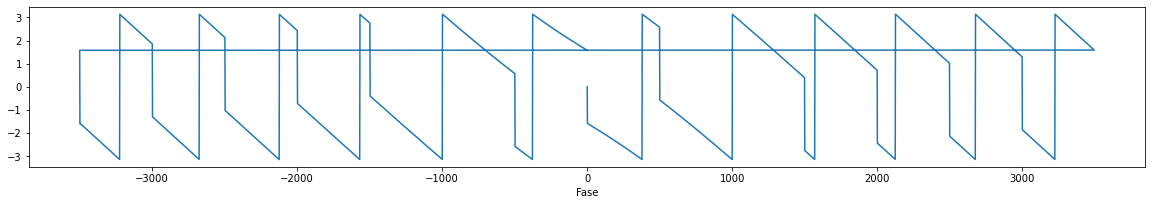

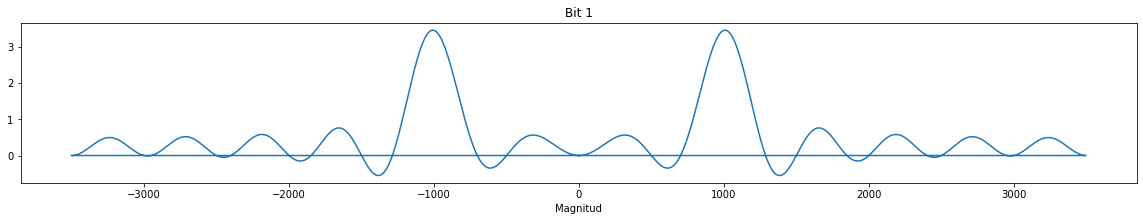

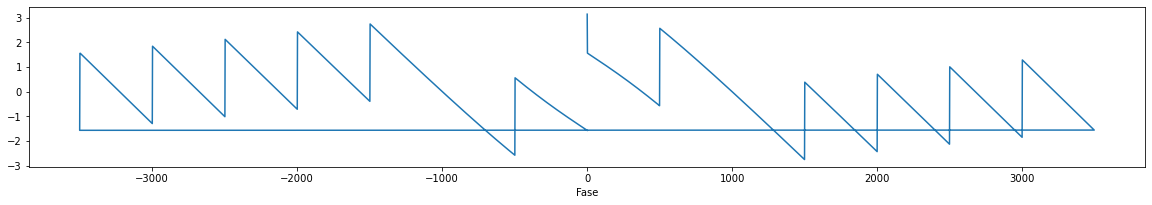

In [10]:
#Magnitud
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(freq,Xf0)
plt.title("Bit 0")
plt.xlabel('Magnitud')

#Fase
plt.figure(figsize=(20,10))
s0_fas=np.angle(Xf0)
plt.subplot(3,1,2)
plt.plot(freq,s0_fas)
plt.xlabel('Fase')

#Magnitud
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(freq,Xf1)
plt.title("Bit 1")
plt.xlabel('Magnitud')

#Fase
plt.figure(figsize=(20,10))
s0_fas=np.angle(Xf1)
plt.subplot(3,1,2)
plt.plot(freq,s0_fas)
plt.xlabel('Fase')

Cual es la diferencia entre ambas?
- Podemos ver que las señales son contrarias, y presentan un desfase entre ellas de 180 entre ellas.

4. Concatene las senales s0 y s1 de acuerdo con la trama a enviar, por ejemplo: si la trama a enviar es ’0010’, la senal a enviar es [s0, s0, s1, s0].
5. Grafique la señal obtenida en el tiempo. ¿Se puede distinguir cada uno de los bits?

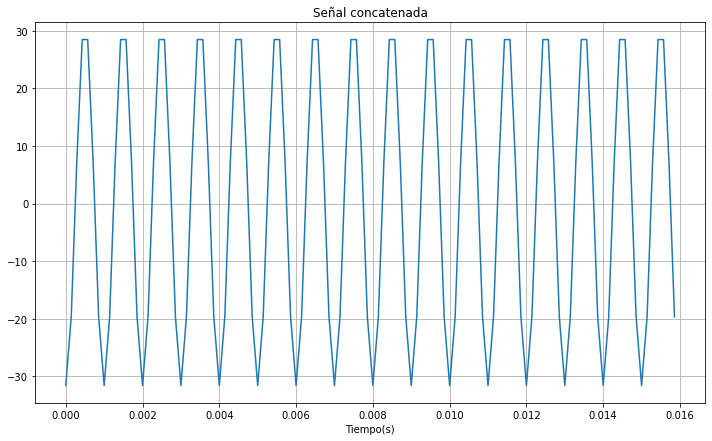

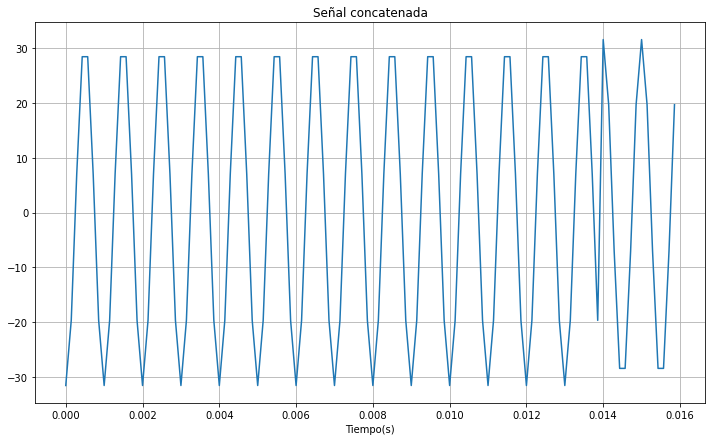

In [11]:
D1=[s0,s0,s0,s0]
D2=[s0,s0,s0,s0]

t=np.arange(0,8*Tb,1/fs) #desde 0 a 8 bits
s_trama=np.append(D1,D2)

plt.figure(figsize=(12,7))
plt.plot(t,s_trama)
plt.title("Señal concatenada")
plt.xlabel("Tiempo(s)")
plt.grid()

D1=[s0,s0,s0,s0]
D2=[s0,s0,s0,s1]

t=np.arange(0,8*Tb,1/fs)
s_trama=np.append(D1,D2)

plt.figure(figsize=(12,7))
plt.plot(t,s_trama)
plt.title("Señal concatenada")
plt.xlabel("Tiempo(s)")
plt.grid()


¿Se puede distinguir cada uno de los bits?
- si dejo mis digitos de cedula de 00 no me es posible ver los cambios de fase en la señal, al agregar un 1 a la secuencia de bits podemos ver el cambio de fase en la señal al encontrar el 1 en la cadena de bits al final de la secuencia.

6. Calcule y grafique la FFT de magnitud y fase de la senal concatenada. ¿Que se puede apreciar?

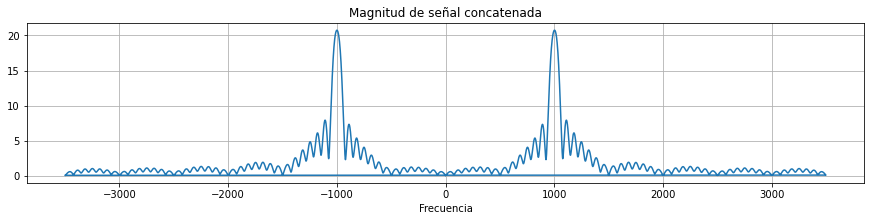

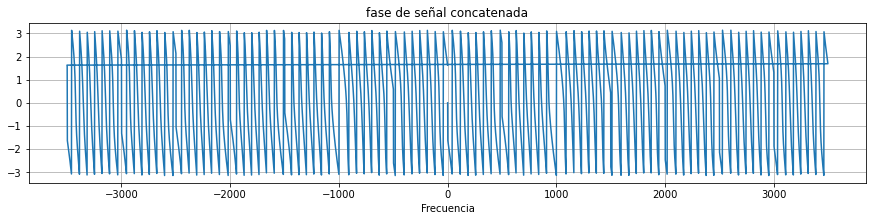

In [12]:
nfft=2**12 # numero de puntos de la transformada
s_trama.shape=(len(s_trama),1) # Convierto en vector columna para poder multiplicar con la matriz
U=dftmatrix(len(s_trama), nfft)
Xf_s_trama=U.H*s_trama[:] # calculo la fft
freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias ...

#Magnitud
plt.figure(figsize=(15,10))
s_trama_mag=np.abs(Xf_s_trama)
plt.subplot(3,1,1)
plt.plot(freq,s_trama_mag)
plt.title("Magnitud de señal concatenada")
plt.grid()
plt.xlabel('Frecuencia')

#Fase
plt.figure(figsize=(15,10))
s_trama_fas=np.angle(Xf_s_trama)
plt.subplot(3,1,2)
plt.plot(freq,s_trama_fas)
plt.title("fase de señal concatenada")
plt.xlabel('Frecuencia')
plt.grid()

¿Que se puede apreciar?
- podemos observar que la señal lleva informacion, la cual se encuentra ubicada en la frecuencia de la portadora fc = 1000 hz dando un nivel dc en este.
- En la fase podemos ver el cambio de fase que se produce en la señal, ubicada de igual manera en la frecuencia fc, donde esta la informacion de la señal.

### 3. Conclusiones
- Se comprende el uso de la Transformada Rapida de Fourier, la cual simplifica los calculos necesarios para encontrar la Transformada Discreta de Fourier y permite una mayor precision en el calculo de la DFT disminuyendo los errores de redondeo.

- NFFT es el numero de puntos de la transformada de Fourier y es importante para hallar de manera correcta la trasformada rapida de furier, entre mas puntos mas resolucion y entre mas resolucion mas infomacion.

- Se aprende el uso de la modulacion Psk, la cual se obtiene combinando señales seno y coseno, o alterando la fase de una señal respecto a la otra, en esta modulacion es posible distinguir los cambios de bits en en los cambios de fase de la señal y en el espectro podemos ver que la informacion de la señal se encuentra centrada con la frecuencia de la portadora.